In [1]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv("Heart.csv")
data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["ChestPain"]=le.fit_transform(data["ChestPain"])
data["Thal"]=le.fit_transform(data["Thal"].astype(str))
data["AHD"]=le.fit_transform(data["AHD"].astype(str))

In [25]:
null_val = ['Age','Sex','ChestPain','RestBP','Chol','Fbs','RestECG','MaxHR','Oldpeak','Slope','Ca','Thal','AHD']
for col in null_val:
    data[col] = data[col].replace(0, np.nan)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.nan, mean)

In [26]:
data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1.0,3.0,145,233,1,2,150,0,2.3,3,0.0,2.0,1.0
1,2,67,1.0,1.0,160,286,0,2,108,1,1.5,2,3.0,2.0,1.0
2,3,67,1.0,1.0,120,229,0,2,129,1,2.6,2,2.0,3.0,1.0
3,4,37,1.0,1.0,130,250,0,0,187,0,3.5,3,0.0,2.0,1.0
4,5,41,1.0,2.0,130,204,0,2,172,0,1.4,1,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1.0,3.0,110,264,0,0,132,0,1.2,2,0.0,3.0,1.0
299,300,68,1.0,1.0,144,193,1,0,141,0,3.4,2,2.0,3.0,1.0
300,301,57,1.0,1.0,130,131,0,0,115,1,1.2,2,1.0,3.0,1.0
301,302,57,1.0,2.0,130,236,0,2,174,0,0.0,2,1.0,2.0,1.0


In [30]:
x = data[['Age','Sex','ChestPain','RestBP','Chol','Thal']].values

In [31]:
y = data['AHD'].values

In [32]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size = 0.80, random_state=0)

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [34]:
model.fit(xTrain, yTrain)

LinearRegression()

In [35]:
yPred = model.predict(xTest)
yPred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(yTest, yPred)
r2

1.0

In [37]:
accu = []
for i in range(1, 101):
  xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.80, random_state=i)
  model = LinearRegression()
  model.fit(xTrain, yTrain)
  yPred = model.predict(xTest)
  r2 = r2_score(yTest, yPred)
  accu.append(r2)

accu_array = np.array(accu)
print(accu_array)
accu_array.max()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


1.0

In [38]:
model.score(x,y)

1.0

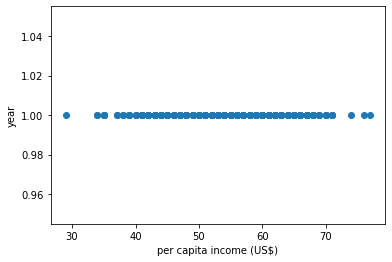

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('per capita income (US$)')
plt.ylabel('year')
plt.scatter(data[['Age']],data['AHD'])